In [95]:
import numpy as np 
import math
import copy

# training data : 

| Size (sqft) | Number of Bedrooms  | Number of floors | Age of  Home | Price (1000s dollars)  |   
| ----------------| ------------------- |----------------- |--------------|-------------- |  
| 2104            | 5                   | 1                | 45           | 460           |  
| 1416            | 3                   | 2                | 40           | 232           |  
| 852             | 2                   | 1                | 35           | 178           |  



In [96]:
# Training data: each row represents one house
# Features (columns):
# [0] Size in square feet
# [1] Number of bedrooms
# [2] Number of floors
# [3] Age of home in years
x_train = np.array([[2104, 5, 1, 45],
                    [1416, 3, 2, 40],
                    [852, 2, 1, 35]])

# Target values: house prices in $1000's
y_train = np.array([460, 232, 178])

print(x_train)

# Print the shape of the input feature matrix (m examples, n features)
print(x_train.shape)

print(y_train)

# Print the shape of the output vector
print(y_train.shape)


[[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]
(3, 4)
[460 232 178]
(3,)


In [97]:
# Initialize model parameters 

# Initial bias term 
b_init = 785.1811367994083

# Initial weights for each feature:
# [0] Size in square feet
# [1] Number of bedrooms
# [2] Number of floors
# [3] Age of home in years
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])

print(w_init.shape)

print(x_train[0])
# Number of training examples (rows in x_train)
m = x_train.shape[0]


(4,)
[2104    5    1   45]


# model prediction :
$$ f_{\mathbf{w},b}(\mathbf{x}) =  w_0x_0 + w_1x_1 +... + w_{n-1}x_{n-1} + b \tag{1}$$
or in vector notation:
$$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b  \tag{2} $$ 


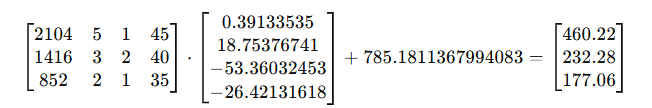

In [98]:
# Model prediction from scratch using linear regression

def linear_regression_function(w, x, b):
    """    
    Args:
        x (ndarray): Shape (n,) example with multiple features
        w (ndarray): Shape (n,) model weights (parameters)    
        b (scalar): Bias term (intercept)    

    Returns:
        final_f (scalar): Predicted price
    """
    n = x.shape[0]  # Number of features
    f = 0         
    for i in range(n):
        f += x[i] * w[i]  
    final_f = f + b       
    return final_f        


In [99]:
# Example: choose the first training sample with 4 features
x_sample = x_train[0, 0:4]  

# Call the prediction function with initial weights and bias
price = linear_regression_function(w_init, x_sample, b_init)

# Output the prediction in a readable format
print(f"The price for a house with {x_train[0][0]} sqft, {x_train[0][1]} bedrooms, "
      f"{x_train[0][2]} floors, and {x_train[0][3]} years old is: ${round(price)}")

The price for a house with 2104 sqft, 5 bedrooms, 1 floors, and 45 years old is: $460


In [100]:
# model prediction using np.dot() :
def linear_regression_function2(w,x,b):
    """
    Args:
      x (ndarray): Shape (n,) example with multiple features
      w (ndarray): Shape (n,) model parameters   
      b (scalar):             model parameter 
      
    Returns:
        (scalar):  price
    """
    return  np.dot(x, w) + b

In [101]:
# Example: choose the first training sample with 4 features
x_sample = x_train[0]
print(x_sample)
# Call the prediction function with initial weights and bias
price = linear_regression_function2(w_init, x_sample, b_init)

# Output the prediction in a readable format
print(f"The price for a house with {x_train[0][0]} sqft, {x_train[0][1]} bedrooms, "
      f"{x_train[0][2]} floors, and {x_train[0][3]} years old is: ${round(price)}")

[2104    5    1   45]
The price for a house with 2104 sqft, 5 bedrooms, 1 floors, and 45 years old is: $460


# cost function 

$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 \tag{3}$$ 
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{4} $$ 


In [102]:
# cost function 
def cost_function (w,x,y,b):
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """
    cost = 0 
    for i in range(m): 
        y_hat = np.dot(x[i], w) + b
        cost += (y_hat - y[i])**2
    final_cost = (1 / (2 * m)) * cost 
    return final_cost

In [103]:
cost =cost_function(x_train,y_train,w_init,b_init)
print(cost)

[[2.19689962e+11 2.70248435e+06 5.96619234e+05 1.10912816e+08]
 [9.96114521e+10 1.45147979e+06 9.74531514e+05 8.87208741e+07]
 [3.61410453e+10 9.74531514e+05 5.96619234e+05 6.90048327e+07]]



$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{6}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{7}
\end{align}
$$


In [104]:
def gradient_derivative(X, y, w, b): 
    m, n = X.shape  # X is of shape (m examples, n features)

    # Initialize gradients for weights and bias
    dj_dw = np.zeros((n,))  
    dj_db = 0.              

    # Loop over each training example
    for i in range(m):                             
        # Compute the error between prediction and actual value
        cost = (np.dot(X[i], w) + b) - y[i]   

        # Accumulate the gradient for each weight
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + cost * X[i, j]  

        # Accumulate the gradient for the bias
        dj_db += cost                        

    dj_dw = dj_dw / m                              
    dj_db = dj_db / m                              

 
    return dj_dw, dj_db

In [105]:
# testing gradient derivative :
dj_db, dj_dw =gradient_derivative(x_train,y_train,w_init,b_init)
print(dj_db, dj_dw)

[-2.72623577e-03 -6.27197263e-06 -2.21745571e-06 -6.92403379e-05] -1.6739251122999121e-06


In [106]:
def gradient_descent (w_in,b,a,iter,x,y):
    
    J_history = []
    # stop condition 
    w = copy.deepcopy(w_in)  #avoid modifying global w within function

    for i in range(iter):
        dj_dw,dj_db=gradient_derivative(x, y, w, b)
        w = w - a*dj_dw
        b= b - a* dj_db

        J_history.append( cost_function(x, y, w, b))

        if i% math.ceil(iter / 10) == 0:
            print(f"Iteration {i}: Cost {J_history[-1]}   ")

    return w,b,J_history
        


In [107]:
w_init = np.zeros(4)

b_init = 0.
alpha = 5.0e-7
iteration = 1000

w_final,b_final,J_history =gradient_descent(w_init,b_init,alpha,iteration,x_train,y_train)

Iteration 0: Cost [[2.19206997e+11 1.23776493e+06 4.94809930e+04 1.00272284e+08]
 [9.92863106e+10 4.45550960e+05 1.97997976e+05 7.92273193e+07]
 [3.59452827e+10 1.97997976e+05 4.94809930e+04 6.06582544e+07]]   
Iteration 100: Cost [[2.19207009e+11 1.23779468e+06 4.94869422e+04 1.00272552e+08]
 [9.92863190e+10 4.45568813e+05 1.98009878e+05 7.92275574e+07]
 [3.59452878e+10 1.98009878e+05 4.94869422e+04 6.06584627e+07]]   


Iteration 200: Cost [[2.19207009e+11 1.23779441e+06 4.94868873e+04 1.00272550e+08]
 [9.92863189e+10 4.45568648e+05 1.98009768e+05 7.92275552e+07]
 [3.59452878e+10 1.98009768e+05 4.94868873e+04 6.06584608e+07]]   
Iteration 300: Cost [[2.19207009e+11 1.23779414e+06 4.94868327e+04 1.00272547e+08]
 [9.92863189e+10 4.45568484e+05 1.98009659e+05 7.92275530e+07]
 [3.59452877e+10 1.98009659e+05 4.94868327e+04 6.06584589e+07]]   
Iteration 400: Cost [[2.19207009e+11 1.23779386e+06 4.94867785e+04 1.00272545e+08]
 [9.92863188e+10 4.45568322e+05 1.98009550e+05 7.92275509e+07]
 [3.59452877e+10 1.98009550e+05 4.94867785e+04 6.06584570e+07]]   
Iteration 500: Cost [[2.19207009e+11 1.23779360e+06 4.94867247e+04 1.00272542e+08]
 [9.92863187e+10 4.45568160e+05 1.98009442e+05 7.92275487e+07]
 [3.59452876e+10 1.98009442e+05 4.94867247e+04 6.06584551e+07]]   
Iteration 600: Cost [[2.19207009e+11 1.23779333e+06 4.94866712e+04 1.00272540e+08]
 [9.92863186e+10 4.45568000e+05 1.98009336e+05 7.92275466e+07]
 [

In [108]:
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = x_train.shape
for i in range(m):
    print(f"prediction: {np.dot(x_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

b,w found by gradient descent: -0.00,[ 0.20396569  0.00374919 -0.0112487  -0.0658614 ] 
prediction: 426.19, target value: 460
prediction: 286.17, target value: 232
prediction: 171.47, target value: 178


In [109]:
def predict_price (x):
    return np.dot(w_final , x )+ b_final

In [115]:
x=np.array([900, 2, 2, 40])
price =predict_price(x)
print(f"The price for a house with {x[0]} sqft, {x[1]} bedrooms, "
      f"{x[2]} floors, and {x[3]} years old is: {(price)}$")

The price for a house with 900 sqft, 2 bedrooms, 2 floors, and 40 years old is: 180.9174281591294$
